In [1]:
import numpy as np

In [41]:
# From Appendix 5.8
def coupling_matrix(M, w):

    t = np.zeros((M,M))
    w0 = np.ones(M)/M
    i = M - 1
    j = M - 1

    while i >= 0 and j >= 0:
        if w[i] <= w0[j]:
            t[i,j] = w[i]
            w0[j] = w0[j] - w[i]
            i -= 1
        else:
            t[i,j] = w0[j]
            w[i] = w[i] - w0[j]
            j -= 1
    return t

def h(x):
    return 7/12*x**3 - 7/2*x**2 + 8*x

def likelihood(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-1/2 * (h(x)-2)**2)

def sheet5_task3(M,prior_samples,w):

    # calculate transformation matrix t_star
    t_star = coupling_matrix(M,w)
    
    # modified transition matrix of Markov Chain
    P = M*t_star
    # sample the posterior_samples from the prior_samples and the t_star
    posterior_samples = np.zeros(M)
    #This samples the new samples via resampling from the conditional distribution p( | x_i)
#     for i in range(M):
#         posterior_samples[i] = np.random.choice(prior_samples, p=P[:,i])
        
    #COMMENT: Alternative: use the mean of the conditional distribution p( | x_i)
#     for i in range(M):
#         posterior_samples[i] = prior_samples @ P[:,i]

    # and this is just a way more performant way to sample the mean: (since no python for-loop involved)
    posterior_samples = P.T.dot(prior_samples)
    
    print("For M =", M)

    # We see that the posterior_mean slowly approaches the value (approx. 0.2095) given in the book in Example 5.14
    posterior_mean = 1/M * sum(posterior_samples)
    print("posterior_mean:", round(posterior_mean,4))
    
    # We see that the posterior_variance slowly approaches the value (approx. 0.0211) given in the book in Example 5.14
    posterior_variance = 1/(M-1) * sum(np.square(np.subtract(posterior_samples, posterior_mean)))
    print("posterior_variance:", round(posterior_variance, 4))


    print()
    return posterior_mean, posterior_variance

In [30]:

# reuse samples from before (for reduced memory usage)

#adjust maximum M value here in case of memory error
chosen_M_list = [2**i for i in range(1, 16)]

M_max = np.max(chosen_M_list)
all_prior_samples = np.random.normal(-2,np.sqrt(1/2),M_max)

means = []
variances = []

for M in chosen_M_list:
    prior_samples = sorted(all_prior_samples[0:M])

    # calculate importance weights
    w = np.zeros(M)
    for i in range(M):
        sample = prior_samples[i]
        w[i] = likelihood(sample)
    w = w / sum(w)    

    mean, variance = sheet5_task3(M,prior_samples,w)
    means.append(mean)
    variances.append(variance)

For M = 2
posterior_mean: -1.356
posterior_variance: 0.0

For M = 4
posterior_mean: -1.356
posterior_variance: 0.0

For M = 8
posterior_mean: -1.0434
posterior_variance: 0.0

For M = 16
posterior_mean: -1.0434
posterior_variance: 0.0

For M = 32
posterior_mean: -1.0328
posterior_variance: 0.0

For M = 64
posterior_mean: -0.4207
posterior_variance: 0.0

For M = 128
posterior_mean: -0.4233
posterior_variance: 0.0001

For M = 256
posterior_mean: -0.0571
posterior_variance: 0.0

For M = 512
posterior_mean: -0.0329
posterior_variance: 0.0003

For M = 1024
posterior_mean: -0.0345
posterior_variance: 0.0005

For M = 2048
posterior_mean: 0.1845
posterior_variance: 0.0427

For M = 4096
posterior_mean: 0.1569
posterior_variance: 0.013

For M = 8192
posterior_mean: 0.1828
posterior_variance: 0.018

For M = 16384
posterior_mean: 0.1934
posterior_variance: 0.0181

For M = 32768
posterior_mean: 0.1918
posterior_variance: 0.0195



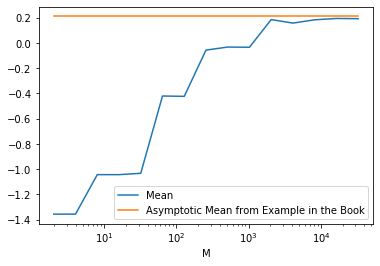

In [44]:
import matplotlib.pyplot as plt
plt.plot(chosen_M_list, means, label="Mean")
plt.plot(chosen_M_list, np.ones(len(chosen_M_list))*0.2095, label="Asymptotic Mean from Example in the Book")
plt.xlabel("M")
plt.xscale("log")
plt.legend()

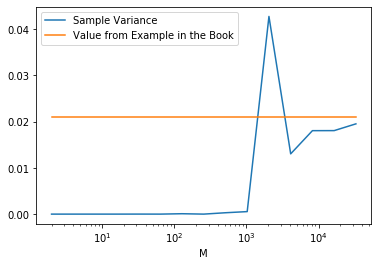

In [43]:
plt.plot(chosen_M_list, variances, label="Sample Variance")
plt.plot(chosen_M_list, np.ones(len(chosen_M_list))*0.0211, label="Asymptotic Variance from Example in the Book")
plt.xlabel("M")
plt.xscale("log")
plt.legend()